# (Fordbike Exploration )
## by (David Gamal Isacc)

## Preliminary Wrangling

>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load our data
df=pd.read_csv(r'C:\Users\david gamal\Downloads\72643_160810_bundle_archive\2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
# info avout data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [4]:
#lets see some stats
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [5]:
#check for nulls
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [6]:
#drop nulls
df= df[df['member_gender'].isnull() == False]
df= df[df['member_birth_year'].isnull() == False]

In [7]:
#check again
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [8]:
df['member_gender'].value_counts()

Male      348318
Female     98542
Other       6299
Name: member_gender, dtype: int64

In [9]:
df['user_type'].value_counts()

Subscriber    404424
Customer       48735
Name: user_type, dtype: int64

In [10]:
#check for duplicated value
df.duplicated().sum()

0

In [11]:
#now lets transform time rows to date 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [12]:
#now lets make new col for start time hour
df['day_of_week']= df['start_time'].dt.strftime('%a')
df['start_time_hour']= df['start_time'].dt.hour

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,day_of_week,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,Sun,15
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,Sun,14
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,Sun,23
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,Sun,23


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int64         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  int64         
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  int64         
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  int64         
 12  user_type       

In [15]:
#now lets make new col for age, -2017 because this data from 2017
df['member_age'] = 2017 - df['member_birth_year']
df['member_age']=df['member_age'].astype(int)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,day_of_week,start_time_hour,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,Sun,16,30
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,Sun,15,52
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,Sun,14,20
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,Sun,23,26
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,Sun,23,27


In [16]:
#lets make new col for duration in min
df['duration_min']=df.duration_sec/60
df['duration_min']=df['duration_min'].astype(int)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,day_of_week,start_time_hour,member_age,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,Sun,16,30,1335
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,Sun,15,52,1313
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,Sun,14,20,726
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,Sun,23,26,75
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,Sun,23,27,36


In [17]:
print(df.info(),df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int64         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  int64         
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  int64         
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  int64         
 12  user_type       

In [18]:
df.columns.tolist()

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'day_of_week',
 'start_time_hour',
 'member_age',
 'duration_min']

### What is the structure of your dataset?

our data contains more than 450000 trip with 19 features ['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'day_of_week',
 'start_time_hour',
 'member_age',
 'duration_min'] 
### What is/are the main feature(s) of interest in your dataset?

age of user , type of user , the duration time and how long trips take ,

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

the duration time , im also create some features to helps me <br>
- day_of_week <br>
- start_time_hour <br>
- member_age <br>
- duration_min 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Make sure that, after every plot or related series of plots, that you include a Markdown cell with comments about what you observed, and what you plan on investigating next.

## lets see the distribution of member ages 

131

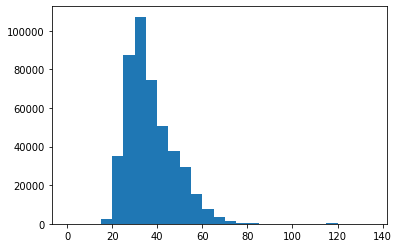

In [19]:
#create histogram for member ages 
bin_edges = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(df.member_age,bins=bin_edges)
df['member_age'].max()

## as we can see we have some out liers , the max age is 131 somthing wrong in this data we can avoid the out liers by make some changes in our code

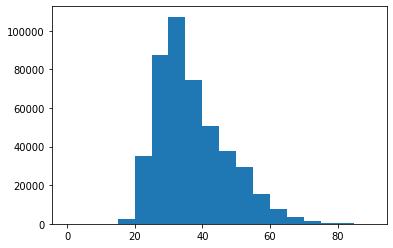

In [20]:
#avoid the outliers in ages 
bin_edges = np.arange(0, 95, 5)
plt.hist(df.member_age,bins=bin_edges);

# now its make sense , as we can see the most of member ages under 40 , we can make violin plot to make it more clear

## we can use violin and box plots to make it more clearly

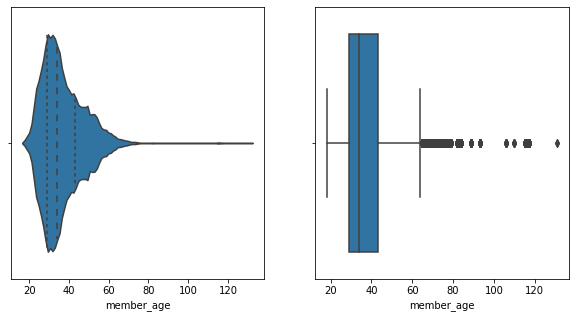

In [21]:
#create violin and box plots for ages
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.violinplot(df['member_age'], inner= 'quartile');
plt.subplot(1, 2, 2)
sb.boxplot(df.member_age);


## now we can see easly that the most of member ages are between 20 and 40 old

# lets make bar chart to see the frequancy of member gender 

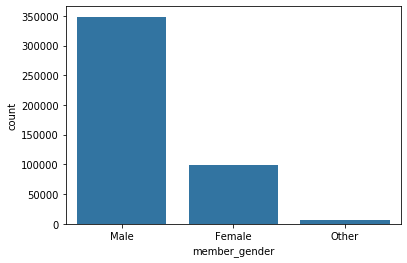

In [22]:
#create countplot for gender 
sb.countplot(df.member_gender,color=sb.color_palette()[0])

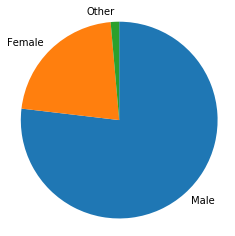

In [23]:
#pie chart for gender for more clear 
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

## we can see crearly that male members are more than female the ratio between them close to 3:1 

# now lets use day of week to see the day with hieghst trip 

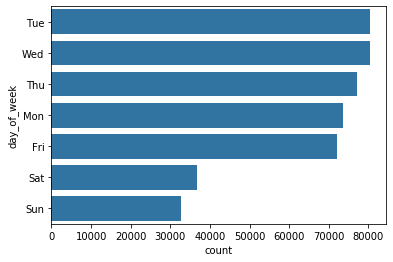

In [24]:
#creat h-countplot for day of week 
dow_order=df['day_of_week'].value_counts().index
sb.countplot(data=df, y='day_of_week',color=sb.color_palette()[0],order=dow_order);

## tue and wed day have most trips and they so close , while sun day is the lowest

# lets see the bar chart for user type 

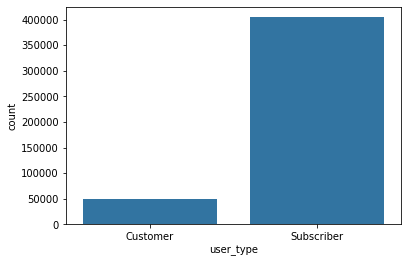

In [25]:
#create count plot for user-type
sb.countplot(df.user_type,color=sb.color_palette()[0]);

## as we can see subscriber more than customer 

# lets see the distribution of the duration in min 


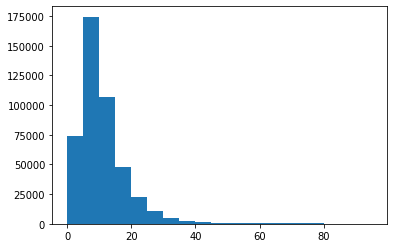

In [26]:
#create histogram for duration in min
bin_edges = np.arange(0, 100, 5)
plt.hist(df.duration_min, bins=bin_edges);

## as we see its right skewed distribution and most of data below 20 min

# what is the most crowded start station

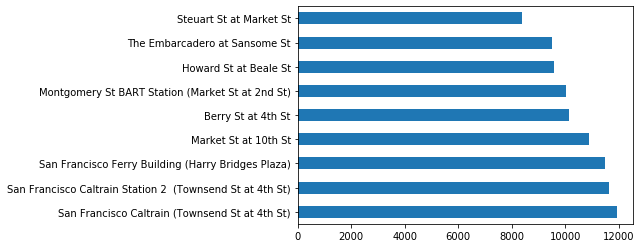

In [27]:
#create h-countplot for top 10 start station
df.start_station_name.value_counts()[:9].plot(kind='barh');

# we have many station so i take top 10 to make my plot and san fransisco caltrain staation is the most start station in trips

# now lets see end station

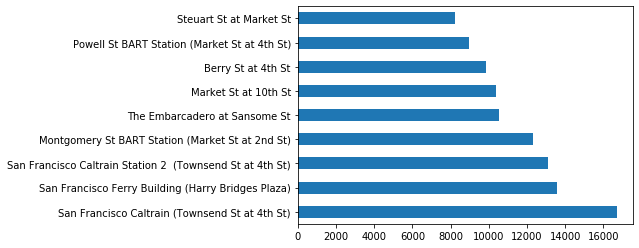

In [28]:
#create h-countplot for top 10 end station
df.end_station_name.value_counts()[:9].plot(kind='barh');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> nothing surprice me , in duration there is outliers but it expected .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> nothing is unexpected the distributions are normal for example in member age we can expect that young age ride bikes more than matures and we can see it.
i make some changes in this data by create new column that can help me for example data doesnt have age column so i creat it to help me .

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# first im interest to see the relation between age and duration 

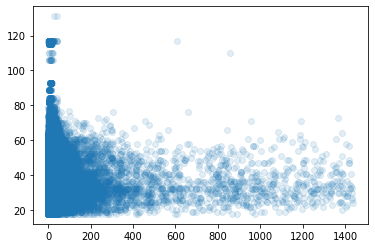

In [29]:
#create scatter plot to see relation between age and duration
plt.scatter(df['duration_min'],df['member_age'],alpha=1/8)

## as we can see ther is negtive relation between age and duration when age go down duration be get higher , and its modrate negative relation 

# lets see the relation between gender and duration

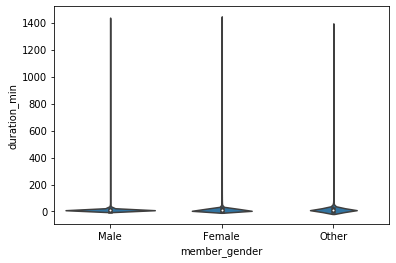

In [30]:
#create violinplot to see the realation between gender and duration
sb.violinplot(data = df, x = 'member_gender', y = 'duration_min',color=sb.color_palette()[0])

# the problem her is the outliers so we need to avoid it for clear view

(-20, 100)

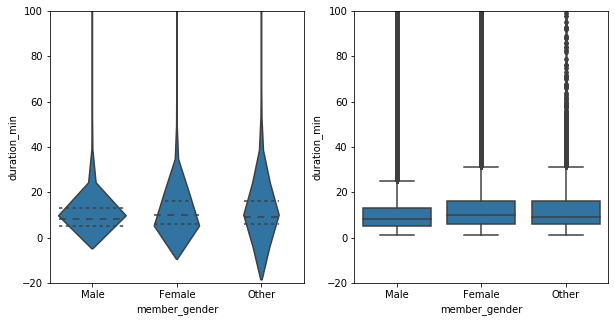

In [31]:
#now lets avoid the outliers 
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=df,x='member_gender',y='duration_min', inner= 'quartile',color=sb.color_palette()[0]);
plt.ylim(-20,100)
plt.subplot(1, 2, 2)
sb.boxplot(data=df,x='member_gender',y='duration_min',color=sb.color_palette()[0]);
plt.ylim(-20,100)

# we can notice that others and females have duration time more than male , but the most of riders are males

# now lets make cluster bar chart to see gender with user type 

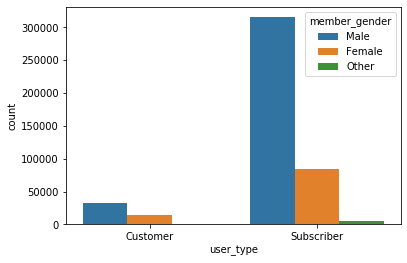

In [32]:
#create cluster bar-chart for user-type and gender
sb.countplot(data = df, x = 'user_type', hue = 'member_gender');

# lets make the imager more clear with heatmap

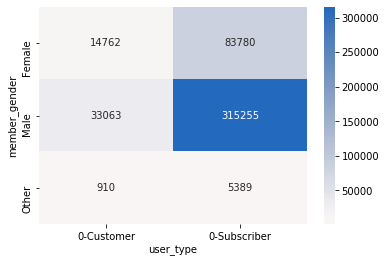

In [33]:
#create heat-map for user-type and gender
g_t_counts = df.groupby(['user_type', 'member_gender']).size()
g_t_counts = g_t_counts.reset_index()
g_t_counts = g_t_counts.pivot(index = 'member_gender', columns = 'user_type')
sb.heatmap(g_t_counts,annot = True, fmt = 'd',cmap = 'vlag_r', center = 0)
plt.xlabel('user_type');

# as we can see the male subscricer is the highest

# now i want to see the distribution for every day in the week , to do that we need to use facet technique .

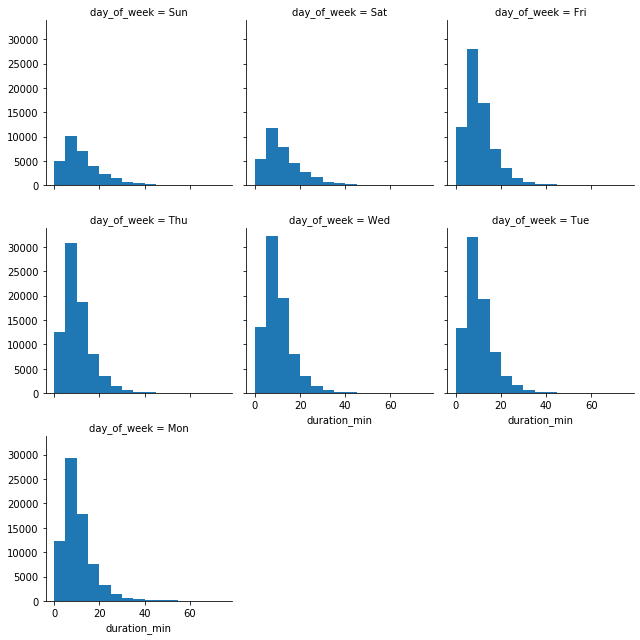

In [34]:
#create histogram for each day of the week
g = sb.FacetGrid(data = df, col = 'day_of_week', col_wrap = 3)
g.map(plt.hist, "duration_min",bins = np.arange(0,80, 5))


# as we can see sat and sun day have the lowest frequancy bot they all look like right skewed and its normal bec the distribution for whole duration is right skewed.

# now lets make some charts to see the big image

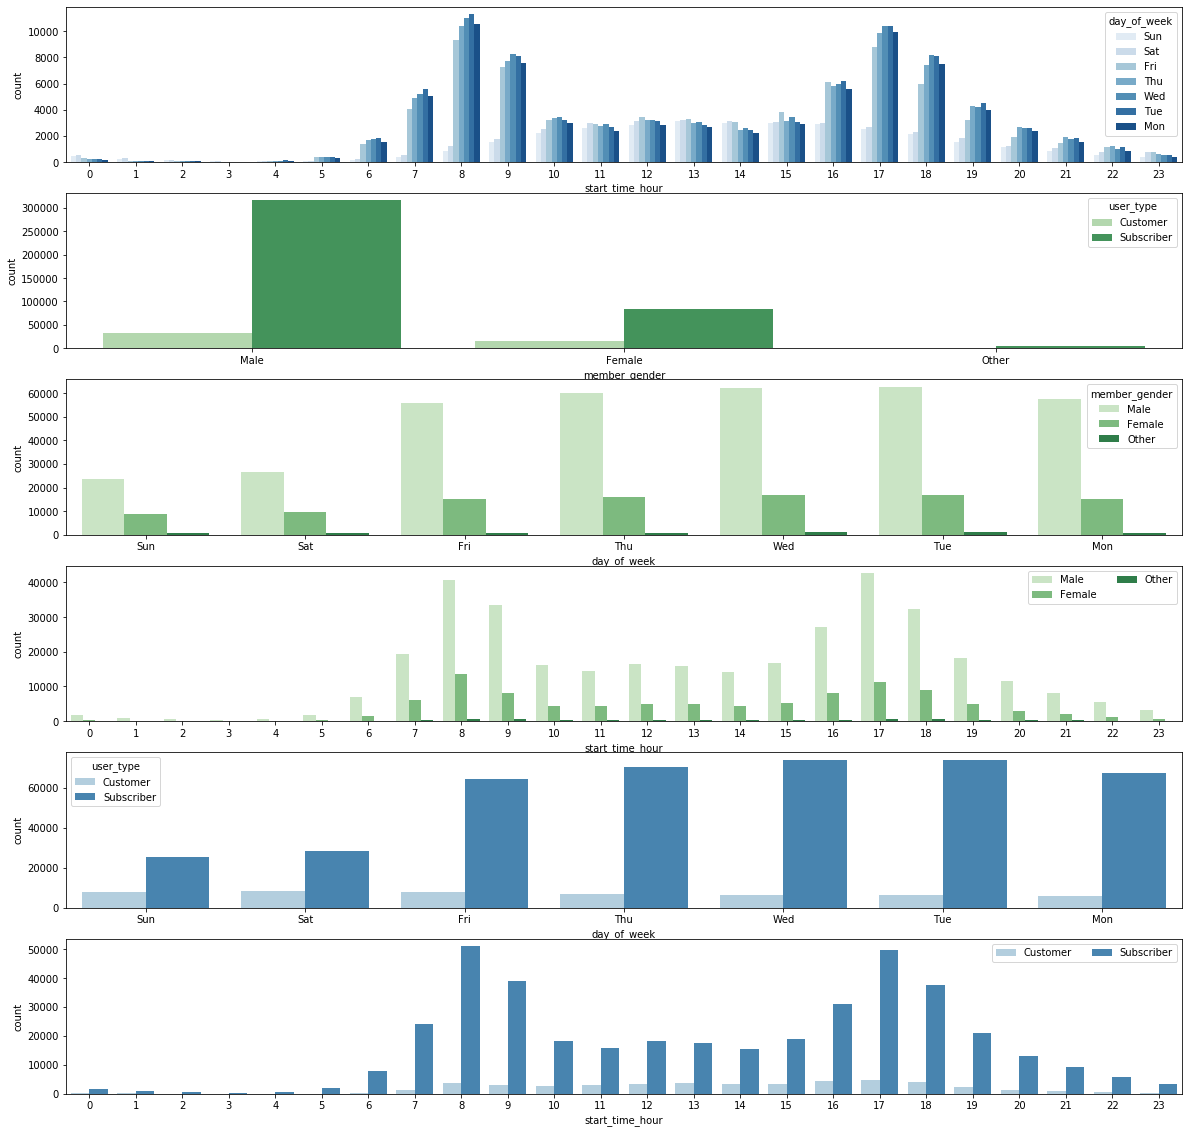

In [35]:
#create count-plots to see the counts for each pair 
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df, x = 'start_time_hour', hue = 'day_of_week', palette = 'Blues');

ax = plt.subplot(6, 1, 2);

sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Greens');

ax = plt.subplot(6, 1, 3);
sb.countplot(data = df, x = 'day_of_week', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df, x = 'start_time_hour', hue = 'member_gender', palette = 'Greens');
ax.legend(ncol = 2);

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type', palette = 'Blues');

ax = plt.subplot(6, 1, 6);
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'Blues');
ax.legend(loc = 1, ncol = 2);

## Observations from above plots:
#### Tuesday, 9:00 AM has the highest biker counts across 7 days, 24 hours. <br>
#### females never was more than males in any time . <br>
#### as we mentioned before most of users are subscribers . <br>
#### most of users are males. <br>
#### there is more custmors in sunday and saterday . <br>
#### most of cusmor and subscribers are males. <br>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as we can see the duration depened on age , and the trips also depend on age most of users are below 40 .<br>
the bikers number depend on day of week and hour of day .<br>
most of bikers are males we can notice that females doesnt like bikes like males.<br>



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> something that wondaring me that have more duration time than males ,while males are the most .<br>
the same thing rebeat with custmors they have more duration time , while the most bikers are subscribers .

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# now lets make big heat map to see the corr for the numeric columns

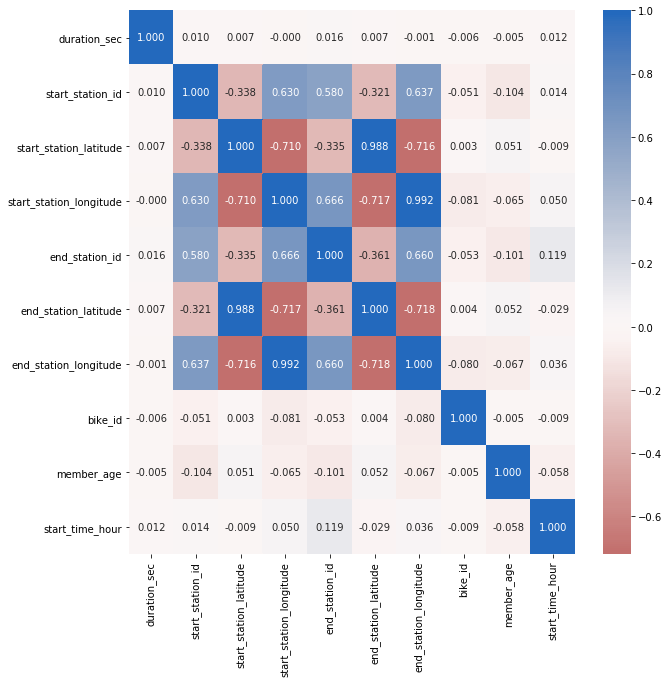

In [36]:
#create heat-map for all numaric columns
important_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_age','start_time_hour']
plt.figure(figsize = [10, 10])
sb.heatmap(df[important_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

# now lets explain those numbers <br>
from 0 to 0.3 that is weak postive relation<br>
from 0.3 to 0.7 that is modrate postive relation<br>
from 0.7 to 1 that is strong postive relation<br>
from 0 to -0.3 that is weak negative relation<br>
from -0.3 to -0.7 that is modrate negative relation<br>
from -0.7 to -1 that is strong negative relation<br>

# now lets convert it to visuals 

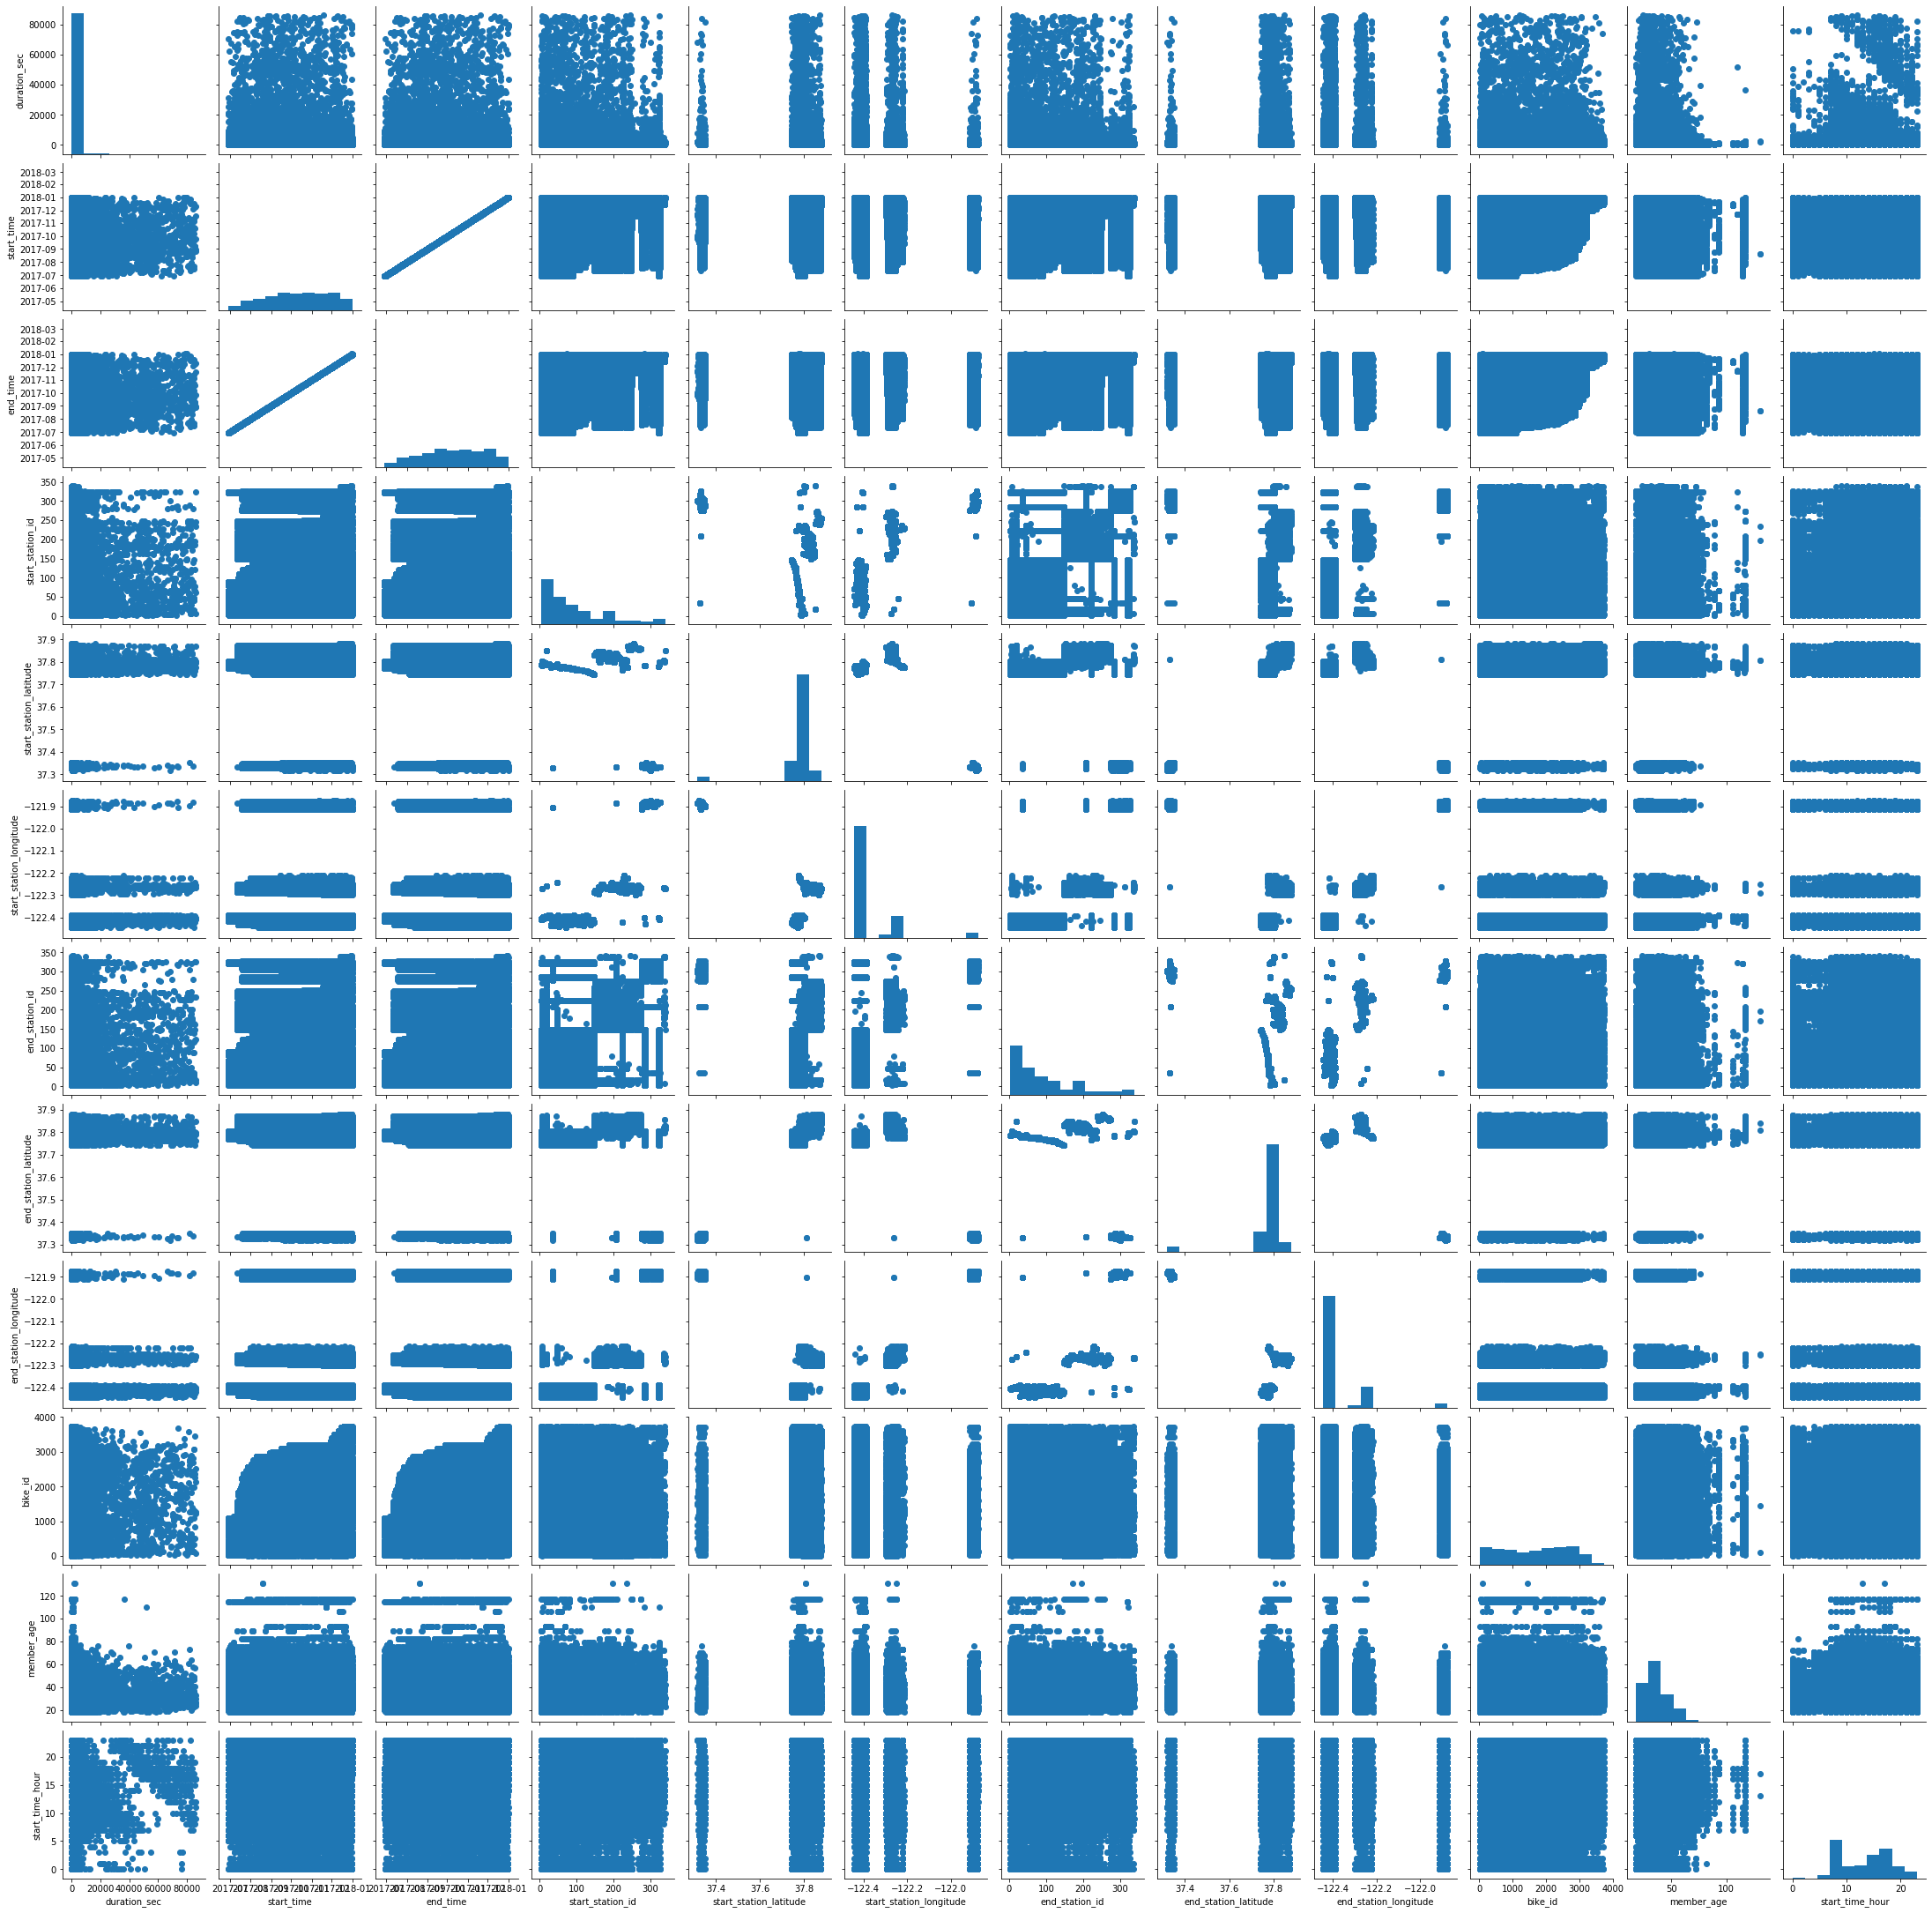

In [37]:
#create scatter for all numaric columns to show the relation
important_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_age','start_time_hour']
g = sb.PairGrid(data = df, vars = important_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# now lets see the duration with type and age

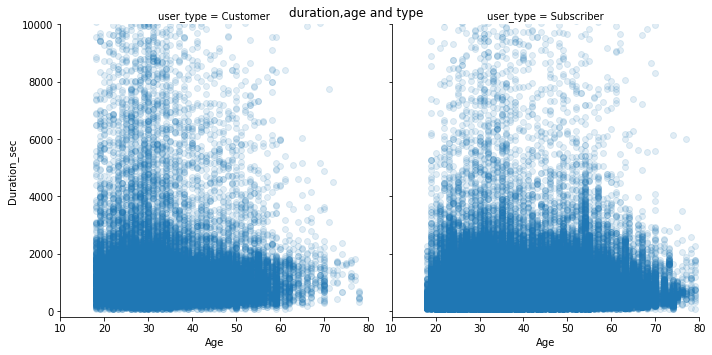

In [44]:
import warnings
warnings.simplefilter("ignore")
#create scatter plot to show the relation between user-type , duration-sec and age
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-200,10000],margin_titles = True)
user_type.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1/8)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('duration,age and type')
plt.show()

# they look similer but subscriber type has more users +60

# now lets see the duration with gender and age

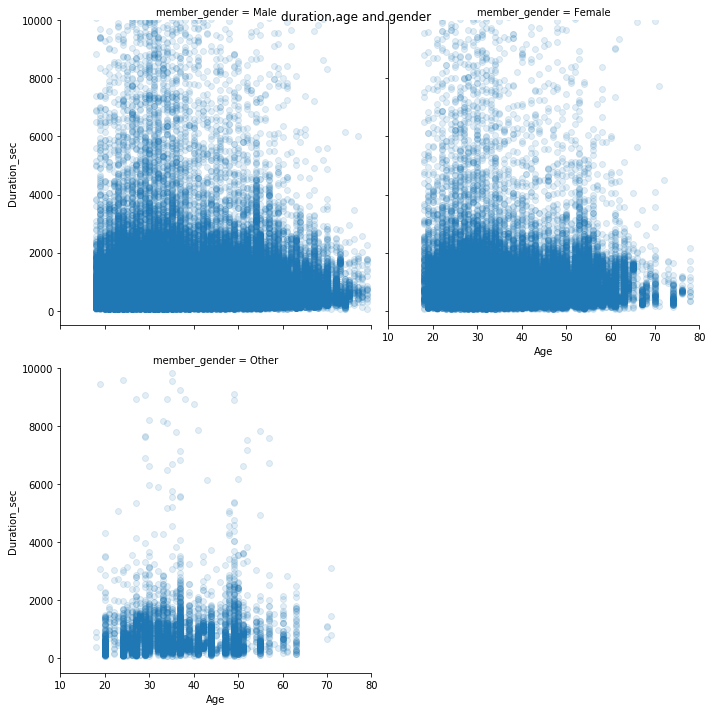

In [39]:
#create scatter plot to show the relation between age, duration-sec and age
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 10000],margin_titles = True)
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1/8)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('duration,age and gender')
plt.show()

# they all have modrate postive relation

# day of week with duration and age

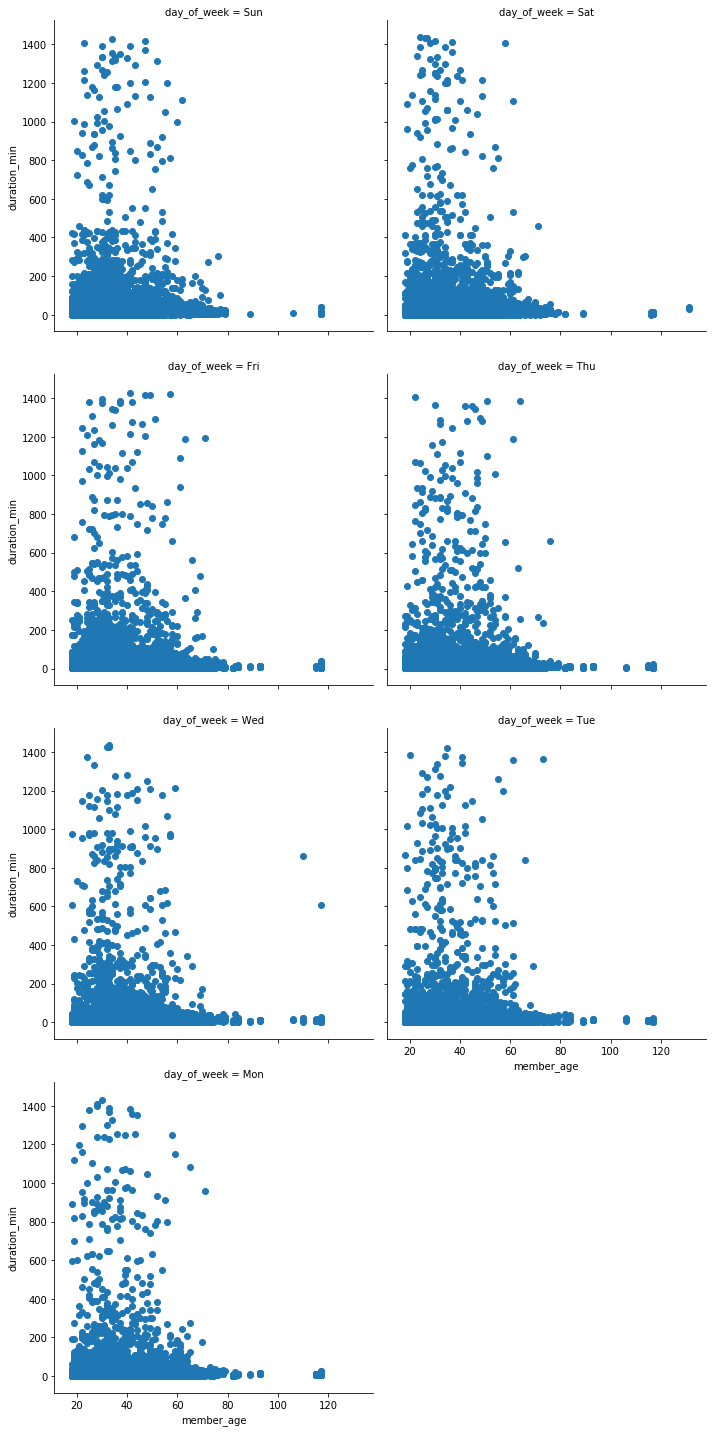

In [40]:
#create scatter plot to show the relation between day of week , duration-min and age
d= sb.FacetGrid(data = df, col = 'day_of_week',  size =5 ,col_wrap = 2,
                margin_titles = True)
d.map(plt.scatter, 'member_age', 'duration_min')

# suterday and sunday has longer duration and older people have high duration in tuesday

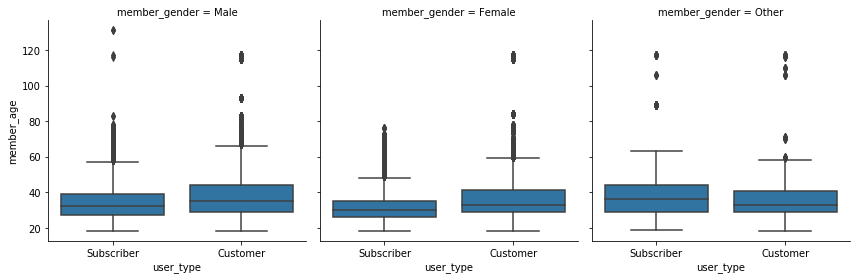

In [45]:
#create box plot to show the relation between user-type , gender and age
gg = sb.FacetGrid(data = df, col = 'member_gender', size = 4)
gg.map(sb.boxplot, 'user_type', 'member_age')

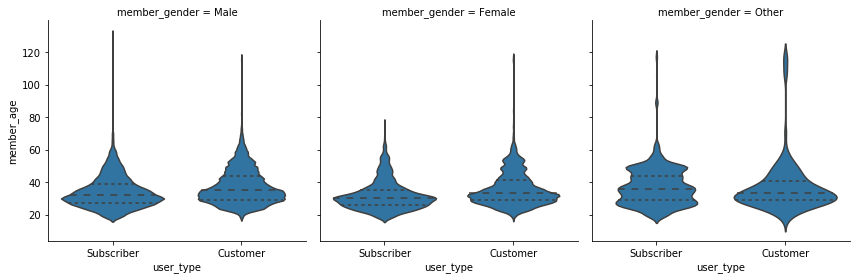

In [46]:
#create violin plot to show the relation between user-type , gender and age
gg = sb.FacetGrid(data = df, col = 'member_gender', size = 4)
gg.map(sb.violinplot, 'user_type', 'member_age',inner='quartile')

# as we can see in male and female genders customer ages are older sub , only in other its oppisite 

# now lets make four dimentions plots with two cat vars and two num vars <br>
gender,type,duration,age

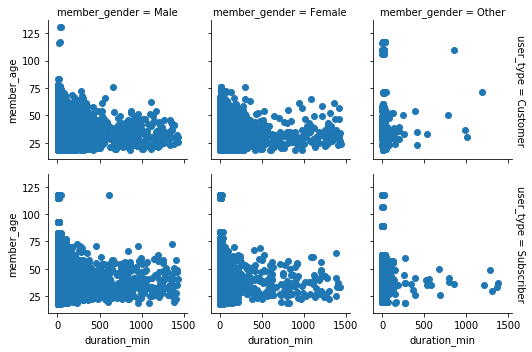

In [47]:
#create scatter plot to see relation between four columns (gender, age , duration-min,user-type)
fourd = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
fourd.map(plt.scatter, 'duration_min', 'member_age')

# now we can see females with customers time have no outliers in age and thet have good duration ,the best durations is for male subsribers 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> from our heat map we can see that there is no strong relation only between longitude and latitude.
### Were there any interesting or surprising interactions between features?

> the last part was crazy we get deeper and found some intersting things like <br>
females with customers time have no outliers <br>
in ages the other gender is diffrents from males and females<br>
older people have more duration in tuesday